# Problem Sheet 1 - Solutions

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats
import itertools
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

## 1) Exercise on Discrete Prior

In [2]:
# a-c
p = np.arange(0.05, 1.0, 0.1)
prior = np.array([1.0, 5.2, 8.0, 7.2, 4.6, 2.1, 0.7, 0.1, 0.0, 0.0])

print("p = {}".format(p))
# turn prior vector into a vector of probabilities
prior /= np.sum(prior)
print("prior = {}".format(prior))


p = [ 0.050  0.150  0.250  0.350  0.450  0.550  0.650  0.750  0.850  0.950]
prior = [ 0.035  0.180  0.277  0.249  0.159  0.073  0.024  0.003  0.000  0.000]


Text(0, 0.5, 'prior probability')

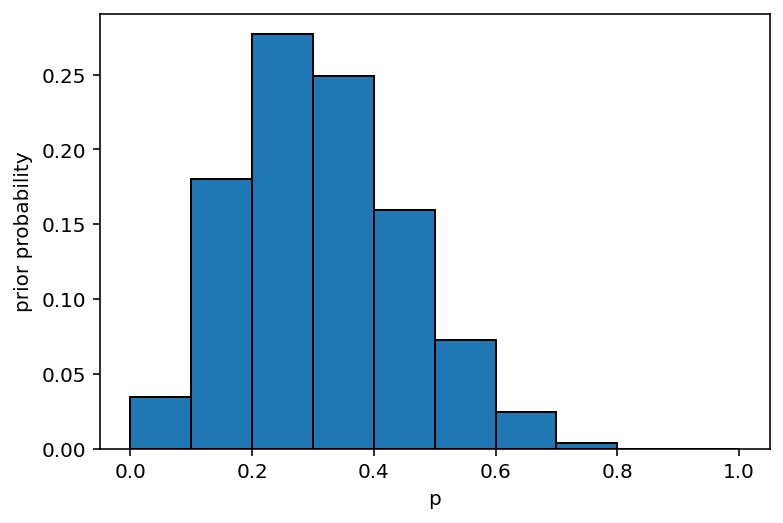

In [3]:
# d
plt.bar(p, prior, 0.1, ec='black');
plt.xlabel('p')
plt.ylabel('prior probability')

In [4]:
# e
def binomial_posterior(p, prior, successes, failures):
    """Calculate the posterior of a binomial experiment.
    Parameters:
    -----------
    p : array
    proportion of population
    prior : array
    prior probabilities - must have same length as p
    successes : number
    number of successes
    failures : number
    number of failures
    Returns:
    --------
    posterior : array
    contains the posterior distribution for the proportions p
    given as an input
    """
    
    likelihood = scipy.stats.binom.pmf(successes, successes + failures, p)
    posterior = likelihood * prior
    posterior = posterior / np.sum(posterior)
    
    return posterior

In [5]:
# f
successes = 11
failures = 27 - successes
posterior = binomial_posterior(p, prior, successes, failures)

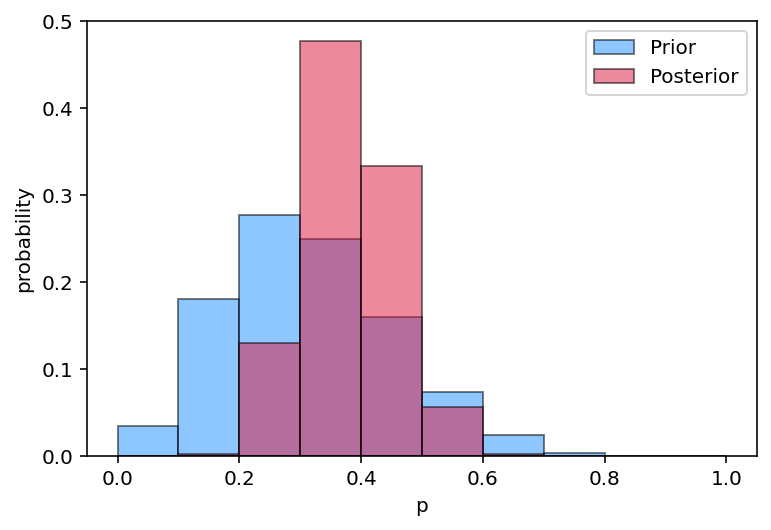

In [6]:
# g
plt.bar(p, prior, 0.1, ec='black', color='DodgerBlue', label='Prior', alpha=0.5);
plt.bar(p, posterior, 0.1, ec='black', color='Crimson', label='Posterior', alpha=0.5);
plt.xlabel('p')
plt.ylabel('probability')
plt.legend(loc='best')

In [7]:
# h
p_set = [0.25, 0.35, 0.45]
prob_set = 0.
for p_i, posterior_i in zip(np.round(p,4), posterior):
    print(p_i, p_set)
    if p_i in p_set:
        print("in set!")
        prob_set += posterior_i
        
print("Posterior probability of p falling in set {} is {:.5f}".format(p_set, prob_set))

0.05 [0.25, 0.35, 0.45]
0.15 [0.25, 0.35, 0.45]
0.25 [0.25, 0.35, 0.45]
in set!
0.35 [0.25, 0.35, 0.45]
in set!
0.45 [0.25, 0.35, 0.45]
in set!
0.55 [0.25, 0.35, 0.45]
0.65 [0.25, 0.35, 0.45]
0.75 [0.25, 0.35, 0.45]
0.85 [0.25, 0.35, 0.45]
0.95 [0.25, 0.35, 0.45]
Posterior probability of p falling in set [0.25, 0.35, 0.45] is 0.93976


In [8]:
# In short:
print(posterior[2:5].sum())

0.9397608225148019


## 2) Shape and properties of statistical distributions

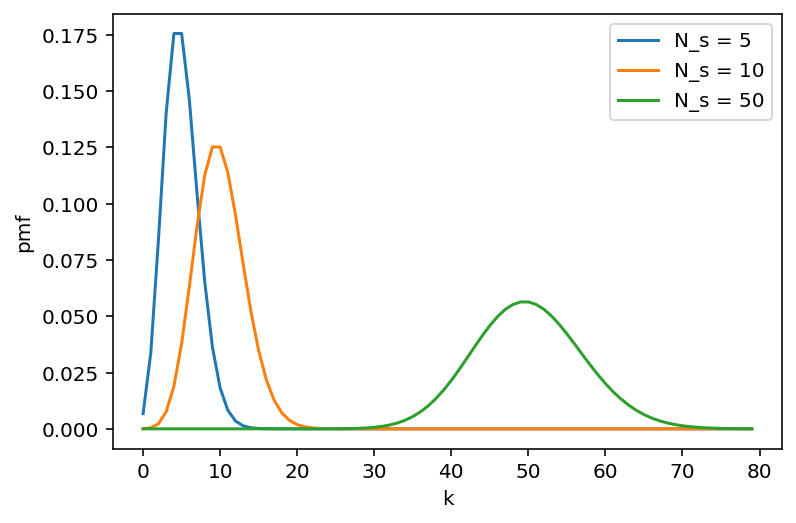

In [16]:
# a
k_values = np.arange(80) # np.linspace(0,50,100)
for n_successes in [5, 10, 50]:   
    label = "N_s = {}".format(n_successes)
    plt.plot(k_values, scipy.stats.poisson.pmf(k_values, n_successes), 
            label=label)
plt.xlabel('k')
plt.ylabel('pmf')
plt.legend()


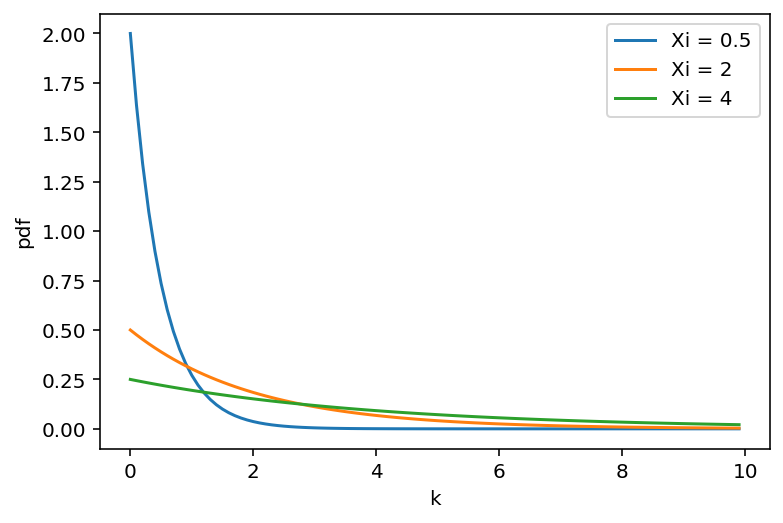

In [10]:
# b
k_values = np.arange(0, 10, 0.1)
for xi in [0.5, 2, 4]:
    label = "Xi = {}".format(xi)
    plt.plot(k_values, scipy.stats.expon.pdf(k_values, 0., xi), 
            label=label)
plt.xlabel('k')
plt.ylabel('pdf')
plt.legend()


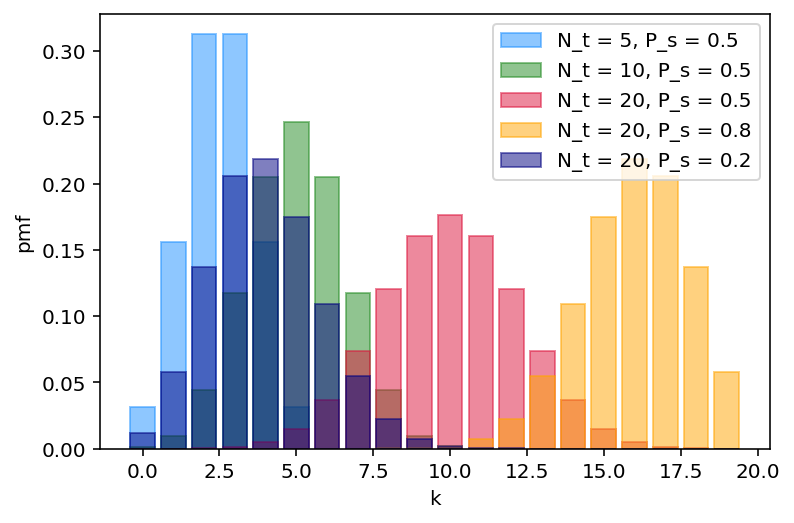

In [17]:
# c
colors = itertools.cycle(["DodgerBlue", "ForestGreen", "Crimson", "Orange", "Navy"])

k_values = np.arange(0, 20)
for n, p in [(5, 0.5), (10, 0.5), (20, 0.5), (20, 0.8),(20, 0.2)]:
    label = "N_t = {}, P_s = {}".format(n, p)
    color = next(colors)
    plt.bar(k_values, scipy.stats.binom.pmf(k_values, n, p), color=color, 
           alpha=0.5, ec=color, label=label)
    
plt.xlabel('k')
plt.ylabel('pmf')
plt.legend()

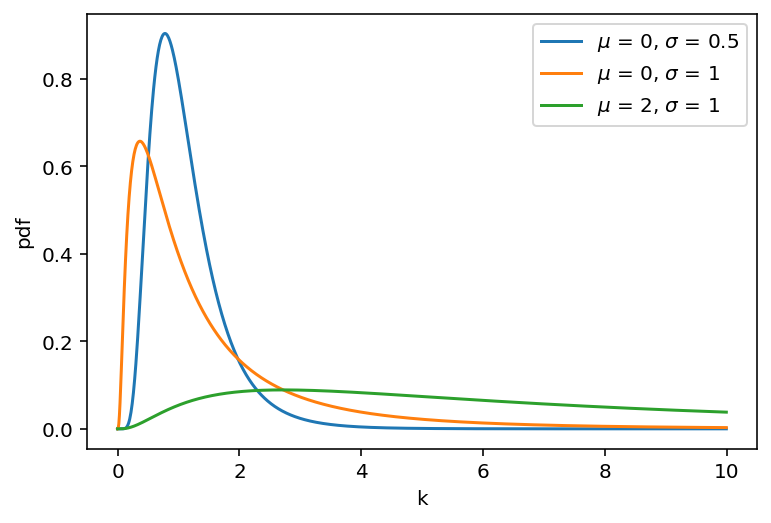

In [12]:
# d
k_values = np.arange(0.001, 10, 0.01)
for mu, sigma in [(0, 0.5), (0, 1), (2, 1)]:
    label = r"$\mu$ = {}, $\sigma$ = {}".format(mu, sigma)
    plt.plot(k_values, scipy.stats.lognorm.pdf(k_values, sigma, 0., np.exp(mu)), label=label)
    
plt.xlabel('k')
plt.ylabel('pdf')
plt.legend()

## 3) Relations between different statistical distributions

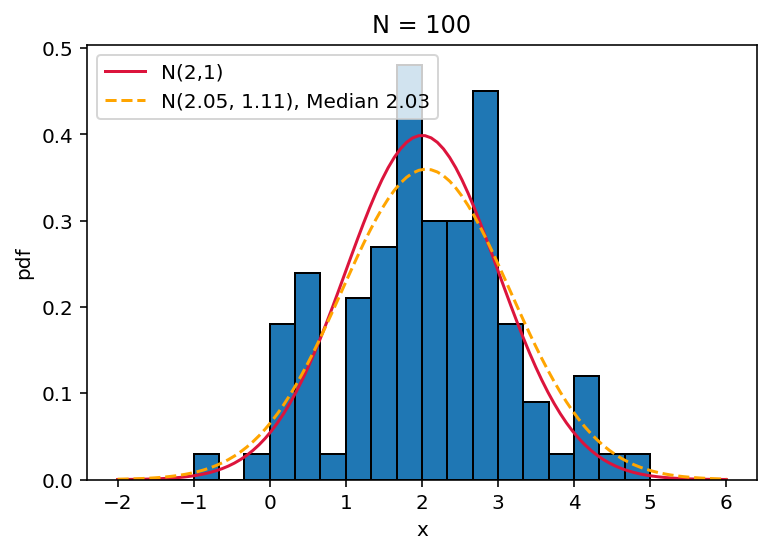

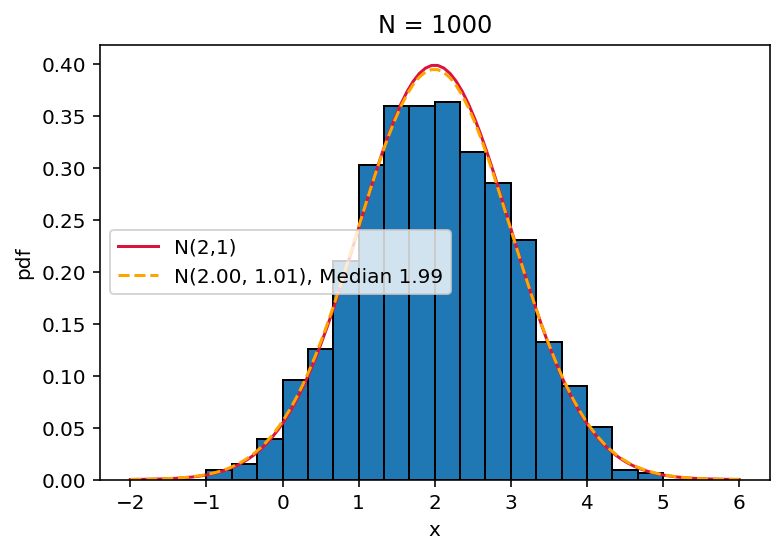

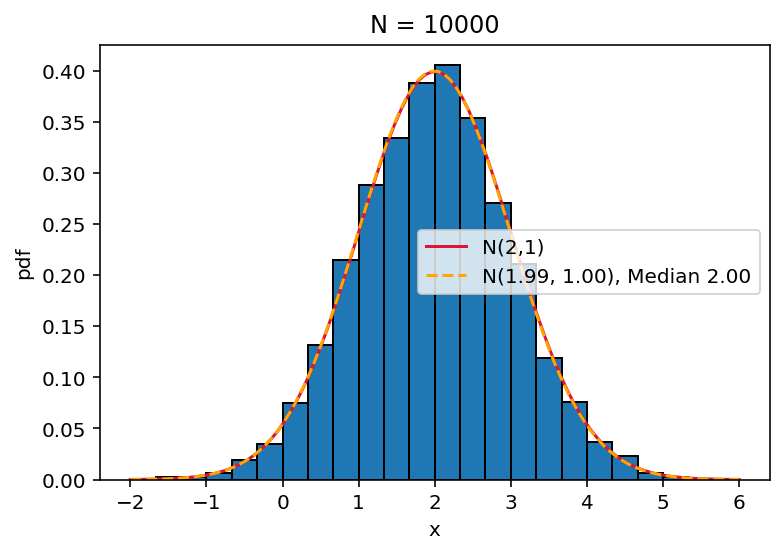

In [13]:
# a-c
mu, sigma = 2, 1
bins = np.linspace(-2, 6, 25)
x_plot = np.linspace(-2, 6, 100)

for n in [100, 1000, 10000]:
    plt.figure()
    x = np.random.normal(mu, sigma, n)
    mean, median, std = np.mean(x), np.median(x), np.std(x)
    plt.hist(x, bins=bins, density=True, ec='black')
    plt.plot(x_plot, scipy.stats.norm.pdf(x_plot, mu, sigma), color='Crimson',
            label="N(2,1)")
    plt.plot(x_plot, scipy.stats.norm.pdf(x_plot, mean, std), color='Orange', ls='--',
            label="N({:.2f}, {:.2f}), Median {:.2f}".format(mean, std, median))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.title('N = {}'.format(n))
    plt.legend(loc='best')

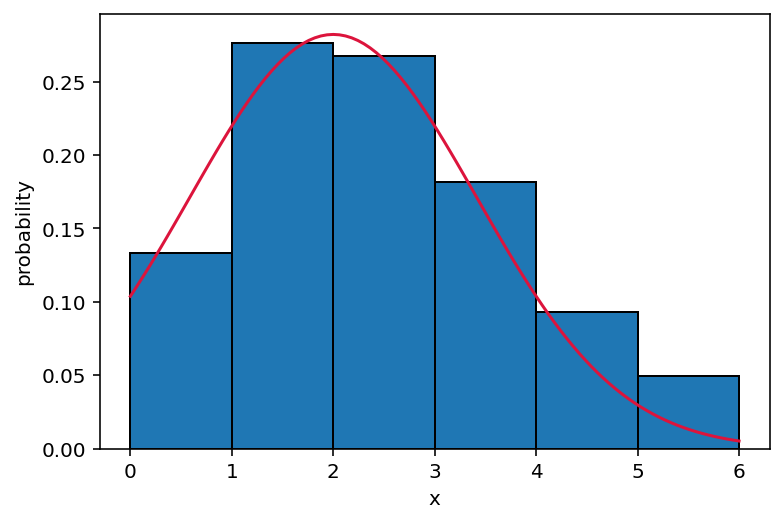

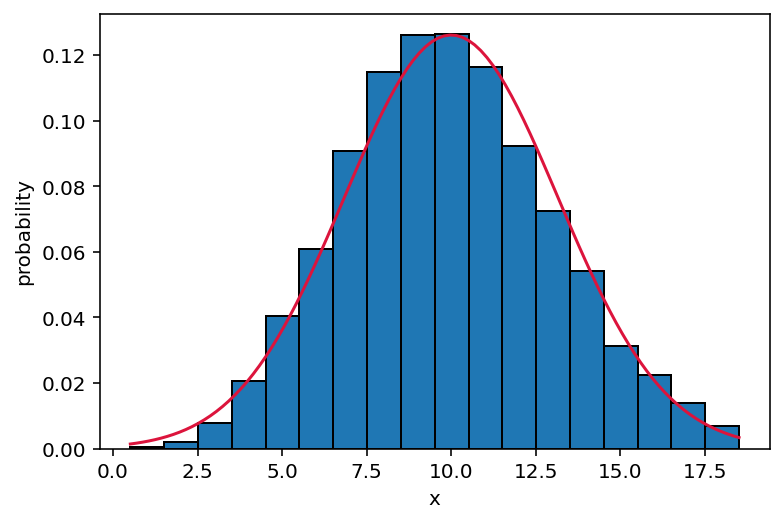

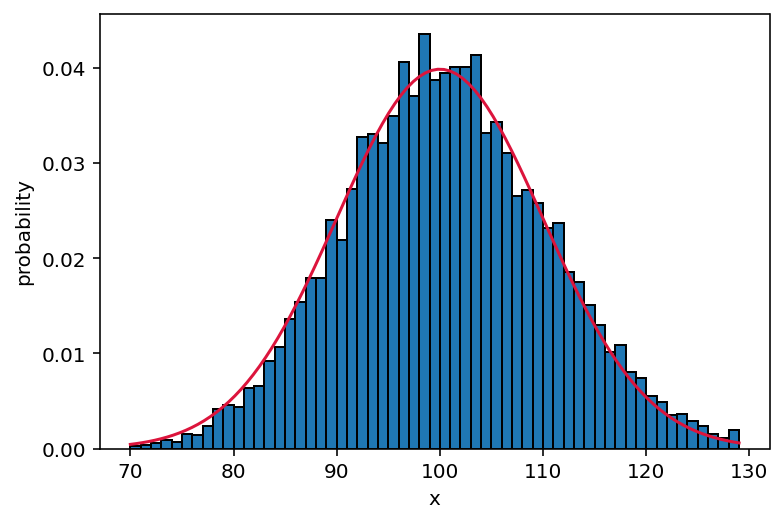

In [14]:
# d
n_p_values = [2, 10, 100]
n_samples = 10000

for n_p in n_p_values:
    plt.figure()
    x = np.random.poisson(n_p, n_samples)
    bin_min = n_p-3*np.sqrt(n_p)
    bin_max = n_p+3*np.sqrt(n_p)
    if bin_min < 0.: bin_min = 0.
    bins = np.arange(bin_min, bin_max)
    if len(bins) > 80:
        bins = np.linspace(bin_min, bin_max, 80)
    x_plot = np.linspace(np.min(bins), np.max(bins), 100)
    plt.hist(x, bins=bins, density=True, ec='black')
    plt.plot(x_plot, scipy.stats.norm.pdf(x_plot, n_p, np.sqrt(n_p)), 
            color='Crimson')
    plt.xlabel('x')
    plt.ylabel('probability')


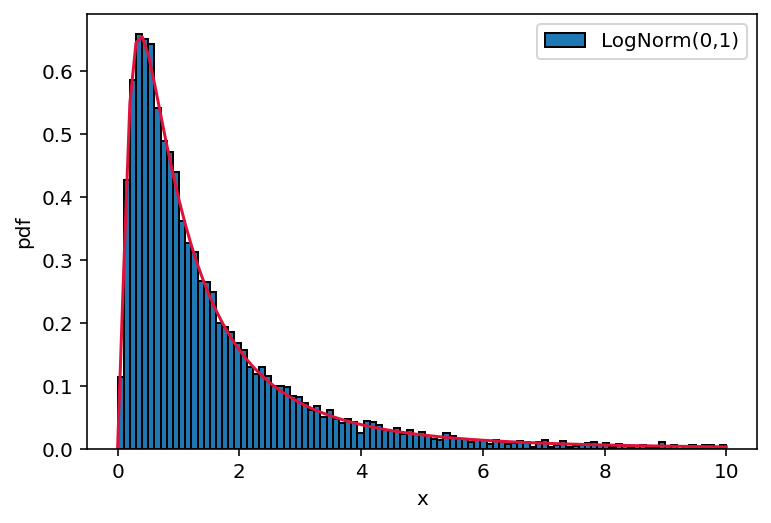

In [15]:
# e
n_samples = 10000
x = np.random.normal(0, 1, n_samples)
x = np.exp(x)
x_plot = np.linspace(0, 10, 100)
bins = np.linspace(0, 10, 100)
plt.hist(x, bins=bins, density=True, ec='black', label='LogNorm(0,1)')
plt.plot(x_plot, scipy.stats.lognorm.pdf(x_plot, 1., 0., 1.), color='Crimson')
plt.xlabel('x')
plt.ylabel('pdf')
plt.legend(loc='best')